In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Longitudinal 

### Microbiome

In [54]:
longIHC_metadata = pd.read_csv('../data/longIHC/Microbiome/longIHC_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample_name', 'mouse_number', 'exposure_type', 'host_age'], index_col=0)
longIHC_metadata.head()

,exposure_type,host_age,mouse_number
sample_name,,,
11548.A15.85.1,Air,10.0,85.0
11548.A15.85.10,Air,14.5,85.0
11548.A15.85.10.b,Air,14.5,85.0
11548.A15.85.11,Air,15.0,85.0
11548.A15.85.11.b,Air,15.0,85.0


In [55]:
longIHC_wUF_dm = pd.read_csv('../data/longIHC/Microbiome/longIHC-wUF-distance-matrix.tsv', sep='\t', index_col=0)
longIHC_wUF_dm.head()

,11548.A19.103.10,11548.A19.102.16,11548.A21.110.9,11548.A18.97.19,11548.A18.98.10,11548.A18.99.1,11548.A22.115.9,11548.A19.102.teeth,11548.A18.98.6,11548.A23.120.17,...,11548.A23.119.17,11548.A22.114.3,11548.A23.118.11,11548.A23.117.3,11548.A19.104.6,11548.A22.115.4,11548.A19.101.11,11548.A18.97.14,11548.A18.100.17,11548.A21.110.4
11548.A19.103.10,0.000000,0.270711,0.777381,0.120938,0.086537,0.900074,0.688085,0.842311,0.675252,0.472511,...,0.644209,0.546071,0.688956,0.401571,0.305652,0.654566,0.553863,0.195562,0.446492,0.557489
11548.A19.102.16,0.270711,0.000000,0.558366,0.265806,0.327251,0.672071,0.451432,0.677917,0.431661,0.270789,...,0.397334,0.319116,0.454846,0.207614,0.177700,0.441900,0.337530,0.193479,0.237006,0.357540
11548.A21.110.9,0.777381,0.558366,0.000000,0.768812,0.831311,0.620398,0.283477,0.608132,0.317785,0.438733,...,0.324966,0.393430,0.246453,0.422464,0.564790,0.294154,0.347496,0.694783,0.468646,0.382917
11548.A18.97.19,0.120938,0.265806,0.768812,0.000000,0.106298,0.898543,0.665501,0.814036,0.649374,0.456790,...,0.612262,0.541770,0.661575,0.397738,0.313036,0.644073,0.543965,0.159363,0.414408,0.562447
11548.A18.98.10,0.086537,0.327251,0.831311,0.106298,0.000000,0.950635,0.715770,0.873716,0.711891,0.516880,...,0.673657,0.594634,0.723150,0.441615,0.369732,0.684904,0.582543,0.203766,0.484126,0.601428


In [56]:
named_longIHC_wUF_dm = pd.merge(longIHC_metadata, longIHC_wUF_dm, left_index=True, right_index=True)
named_longIHC_wUF_dm.head()

,exposure_type,host_age,mouse_number,11548.A19.103.10,11548.A19.102.16,11548.A21.110.9,11548.A18.97.19,11548.A18.98.10,11548.A18.99.1,11548.A22.115.9,...,11548.A23.119.17,11548.A22.114.3,11548.A23.118.11,11548.A23.117.3,11548.A19.104.6,11548.A22.115.4,11548.A19.101.11,11548.A18.97.14,11548.A18.100.17,11548.A21.110.4
11548.A18.100.1,IHC,10.0,100.0,0.930823,0.713872,0.696131,0.929423,0.981533,0.130242,0.527697,...,0.592071,0.528944,0.592230,0.626607,0.793629,0.596738,0.614415,0.831317,0.727477,0.527953
11548.A18.100.10,IHC,14.5,100.0,0.348658,0.289453,0.562941,0.350007,0.380792,0.759813,0.456558,...,0.403792,0.394737,0.451752,0.331118,0.149770,0.432356,0.349023,0.454023,0.179628,0.426739
11548.A18.100.11,IHC,15.0,100.0,0.552467,0.312554,0.357301,0.525504,0.574785,0.511423,0.227300,...,0.184424,0.152964,0.257893,0.217971,0.305802,0.200109,0.147616,0.466483,0.220048,0.164020
11548.A18.100.12,IHC,15.5,100.0,0.610673,0.359905,0.336897,0.584311,0.635806,0.536041,0.203829,...,0.142881,0.262142,0.206289,0.337302,0.327993,0.167681,0.127938,0.522232,0.213049,0.281086
11548.A18.100.13,IHC,16.0,100.0,0.588990,0.343859,0.409169,0.558546,0.615758,0.410275,0.237488,...,0.262292,0.126123,0.319317,0.250070,0.400081,0.278852,0.229552,0.496099,0.309107,0.122442


In [57]:
named_longIHC_wUF_dm['combined'] = named_longIHC_wUF_dm['exposure_type'].map(str) + "_" + named_longIHC_wUF_dm['host_age'].map(str)
named_longIHC_wUF_dm.head()

,exposure_type,host_age,mouse_number,11548.A19.103.10,11548.A19.102.16,11548.A21.110.9,11548.A18.97.19,11548.A18.98.10,11548.A18.99.1,11548.A22.115.9,...,11548.A22.114.3,11548.A23.118.11,11548.A23.117.3,11548.A19.104.6,11548.A22.115.4,11548.A19.101.11,11548.A18.97.14,11548.A18.100.17,11548.A21.110.4,combined
11548.A18.100.1,IHC,10.0,100.0,0.930823,0.713872,0.696131,0.929423,0.981533,0.130242,0.527697,...,0.528944,0.592230,0.626607,0.793629,0.596738,0.614415,0.831317,0.727477,0.527953,IHC_10.0
11548.A18.100.10,IHC,14.5,100.0,0.348658,0.289453,0.562941,0.350007,0.380792,0.759813,0.456558,...,0.394737,0.451752,0.331118,0.149770,0.432356,0.349023,0.454023,0.179628,0.426739,IHC_14.5
11548.A18.100.11,IHC,15.0,100.0,0.552467,0.312554,0.357301,0.525504,0.574785,0.511423,0.227300,...,0.152964,0.257893,0.217971,0.305802,0.200109,0.147616,0.466483,0.220048,0.164020,IHC_15.0
11548.A18.100.12,IHC,15.5,100.0,0.610673,0.359905,0.336897,0.584311,0.635806,0.536041,0.203829,...,0.262142,0.206289,0.337302,0.327993,0.167681,0.127938,0.522232,0.213049,0.281086,IHC_15.5
11548.A18.100.13,IHC,16.0,100.0,0.588990,0.343859,0.409169,0.558546,0.615758,0.410275,0.237488,...,0.126123,0.319317,0.250070,0.400081,0.278852,0.229552,0.496099,0.309107,0.122442,IHC_16.0


In [58]:
named_longIHC_wUF_dm.drop(columns=['host_age', 'exposure_type', 'mouse_number'], inplace=True)

In [59]:
named2_longIHC_wUF_dm = named_longIHC_wUF_dm.set_index('combined')

In [60]:
Named_longIHC_wUF_dm = named_longIHC_wUF_dm[['combined']].copy()
Named_longIHC_wUF_dm.head()

,combined
11548.A18.100.1,IHC_10.0
11548.A18.100.10,IHC_14.5
11548.A18.100.11,IHC_15.0
11548.A18.100.12,IHC_15.5
11548.A18.100.13,IHC_16.0


In [61]:
named3_longIHC_wUF_dm = pd.merge(named2_longIHC_wUF_dm.T, Named_longIHC_wUF_dm, left_index=True, right_index=True)
named4_longIHC_wUF_dm = named3_longIHC_wUF_dm.set_index('combined')
named4_longIHC_wUF_dm.head()

,IHC_10.0,IHC_14.5,IHC_15.0,IHC_15.5,IHC_16.0,IHC_16.5,IHC_17.0,IHC_17.5,IHC_18.0,IHC_18.5,...,Air_19.0,Air_10.5,Air_19.5,Air_11.0,Air_11.5,Air_12.0,Air_12.5,Air_13.0,Air_13.5,Air_14.0
combined,,,,,,,,,,,,,,,,,,,,,
IHC_14.5,0.930823,0.348658,0.552467,0.610673,0.588990,0.327546,0.561276,0.385915,0.446492,0.102248,...,0.663667,0.671278,0.681760,0.411675,0.578716,0.674146,0.548515,0.645411,0.665272,0.718651
IHC_17.5,0.713872,0.289453,0.312554,0.359905,0.343859,0.208759,0.311377,0.204948,0.237006,0.209871,...,0.426526,0.428552,0.445923,0.202173,0.363408,0.448841,0.336007,0.501249,0.475012,0.487450
Air_14.0,0.696131,0.562941,0.357301,0.336897,0.409169,0.580315,0.382518,0.514255,0.468646,0.731446,...,0.291469,0.281954,0.321798,0.456150,0.298330,0.313574,0.323459,0.445971,0.340373,0.317260
IHC_19.0,0.929423,0.350007,0.525504,0.584311,0.558546,0.288546,0.526989,0.376746,0.414408,0.078785,...,0.632804,0.669724,0.632973,0.397010,0.559782,0.650965,0.537190,0.642511,0.631139,0.704476
IHC_14.5,0.981533,0.380792,0.574785,0.635806,0.615758,0.348563,0.589776,0.446598,0.484126,0.144691,...,0.703932,0.727910,0.698087,0.454608,0.608606,0.692438,0.578011,0.696214,0.681460,0.760133


In [62]:
named5_longIHC_wUF_dm = named4_longIHC_wUF_dm.filter(regex='IHC')
named6_longIHC_wUF_dm = named5_longIHC_wUF_dm.T.filter(regex='Air')
named6_longIHC_wUF_dm.head()

combined,Air_14.0,Air_14.0,Air_18.0,Air_13.0,Air_19.0,Air_13.0,Air_16.0,Air_17.0,Air_15.5,Air_16.5,...,Air_15.5,Air_16.5,Air_19.5,Air_18.5,Air_18.0,Air_11.0,Air_15.0,Air_11.0,Air_11.5,Air_11.5
IHC_10.0,0.696131,0.527697,0.732306,0.709209,0.546212,0.793112,0.650968,0.709284,0.681640,0.663403,...,0.593866,0.714712,0.713962,0.697133,0.592071,0.528944,0.592230,0.626607,0.596738,0.527953
IHC_14.5,0.562941,0.456558,0.260940,0.370217,0.516951,0.311732,0.288421,0.443531,0.378053,0.354879,...,0.464705,0.353861,0.267903,0.491569,0.403792,0.394737,0.451752,0.331118,0.432356,0.426739
IHC_15.0,0.357301,0.227300,0.249634,0.342433,0.284040,0.293014,0.191328,0.315530,0.296124,0.267143,...,0.266224,0.269372,0.270202,0.335193,0.184424,0.152964,0.257893,0.217971,0.200109,0.164020
IHC_15.5,0.336897,0.203829,0.247399,0.218004,0.264682,0.310992,0.251284,0.220361,0.177210,0.149979,...,0.213889,0.183780,0.316015,0.264375,0.142881,0.262142,0.206289,0.337302,0.167681,0.281086
IHC_16.0,0.409169,0.237488,0.324912,0.428038,0.280010,0.374983,0.252911,0.389095,0.374919,0.348044,...,0.312264,0.353719,0.319889,0.401725,0.262292,0.126123,0.319317,0.250070,0.278852,0.122442


In [63]:
mean_longIHC_wUF_dm = named6_longIHC_wUF_dm.groupby(level=0).mean()
mean_longIHC_wUF_dm = mean_longIHC_wUF_dm.reindex(index = ['IHC_10.0', 'IHC_10.5', 'IHC_11.0', 'IHC_11.5', 'IHC_12.0', 'IHC_12.5', 'IHC_13.0',
       'IHC_13.5', 'IHC_14.0', 'IHC_14.5', 'IHC_15.0', 'IHC_15.5', 'IHC_16.0', 'IHC_16.5',
       'IHC_17.0', 'IHC_17.5', 'IHC_18.0', 'IHC_18.5', 'IHC_19.0', 'IHC_19.5',  'IHC_20.0'])
mean2_longIHC_wUF_dm = mean_longIHC_wUF_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_longIHC_wUF_dm = mean2_longIHC_wUF_dm.reindex(index = ['Air_10.0', 'Air_10.5', 'Air_11.0', 'Air_11.5', 'Air_12.0', 'Air_12.5', 'Air_13.0',
       'Air_13.5', 'Air_14.0', 'Air_14.5', 'Air_15.0', 'Air_15.5', 'Air_16.0', 'Air_16.5',
       'Air_17.0', 'Air_17.5', 'Air_18.0', 'Air_18.5', 'Air_19.0', 'Air_19.5',  'Air_20.0'])
mean2_longIHC_wUF_dm

,IHC_10.0,IHC_10.5,IHC_11.0,IHC_11.5,IHC_12.0,IHC_12.5,IHC_13.0,IHC_13.5,IHC_14.0,IHC_14.5,...,IHC_15.5,IHC_16.0,IHC_16.5,IHC_17.0,IHC_17.5,IHC_18.0,IHC_18.5,IHC_19.0,IHC_19.5,IHC_20.0
combined,,,,,,,,,,,,,,,,,,,,,
Air_10.0,0.223387,0.436366,0.453340,0.617677,0.534735,0.514000,0.606547,0.609610,0.665103,0.761150,...,0.591257,0.529461,0.713573,0.552229,0.608257,0.643360,0.666914,0.724978,0.635346,0.637016
Air_10.5,0.511948,0.272025,0.236825,0.325776,0.304453,0.289014,0.357722,0.343969,0.366440,0.442063,...,0.323667,0.272784,0.400952,0.278730,0.326186,0.334627,0.375532,0.413367,0.339321,0.582575
Air_11.0,0.578767,0.311752,0.222932,0.274968,0.282232,0.261984,0.319045,0.295710,0.298336,0.358321,...,0.273213,0.231782,0.326486,0.237490,0.271888,0.269100,0.310913,0.336879,0.278767,0.595216
Air_11.5,0.554820,0.303470,0.232488,0.290413,0.286906,0.276796,0.305697,0.295939,0.311620,0.387737,...,0.266887,0.252481,0.363591,0.264275,0.298987,0.305894,0.348406,0.382051,0.304037,0.582413
Air_12.0,0.574630,0.346292,0.320362,0.373293,0.329816,0.327582,0.328357,0.331955,0.371124,0.448248,...,0.293443,0.349503,0.438587,0.339457,0.357909,0.392282,0.430777,0.466701,0.353747,0.587234
Air_12.5,0.556588,0.316663,0.272800,0.343975,0.310445,0.302800,0.328852,0.326909,0.359334,0.442465,...,0.288836,0.300383,0.416000,0.301420,0.334606,0.360086,0.403477,0.441200,0.337876,0.587229
Air_13.0,0.696279,0.482356,0.491651,0.488273,0.460043,0.456584,0.403508,0.408282,0.444480,0.503972,...,0.374892,0.503482,0.517621,0.478024,0.457647,0.498940,0.520501,0.545762,0.432820,0.639675
Air_13.5,0.674793,0.452229,0.455023,0.462945,0.435204,0.438063,0.386723,0.406764,0.436650,0.511302,...,0.363921,0.467653,0.512766,0.452455,0.451192,0.485274,0.515626,0.545057,0.426107,0.630859
Air_14.0,0.570354,0.369760,0.331857,0.413171,0.372993,0.367521,0.394353,0.398266,0.428873,0.511287,...,0.363880,0.362533,0.485288,0.371265,0.407578,0.430858,0.466816,0.503624,0.410627,0.610183


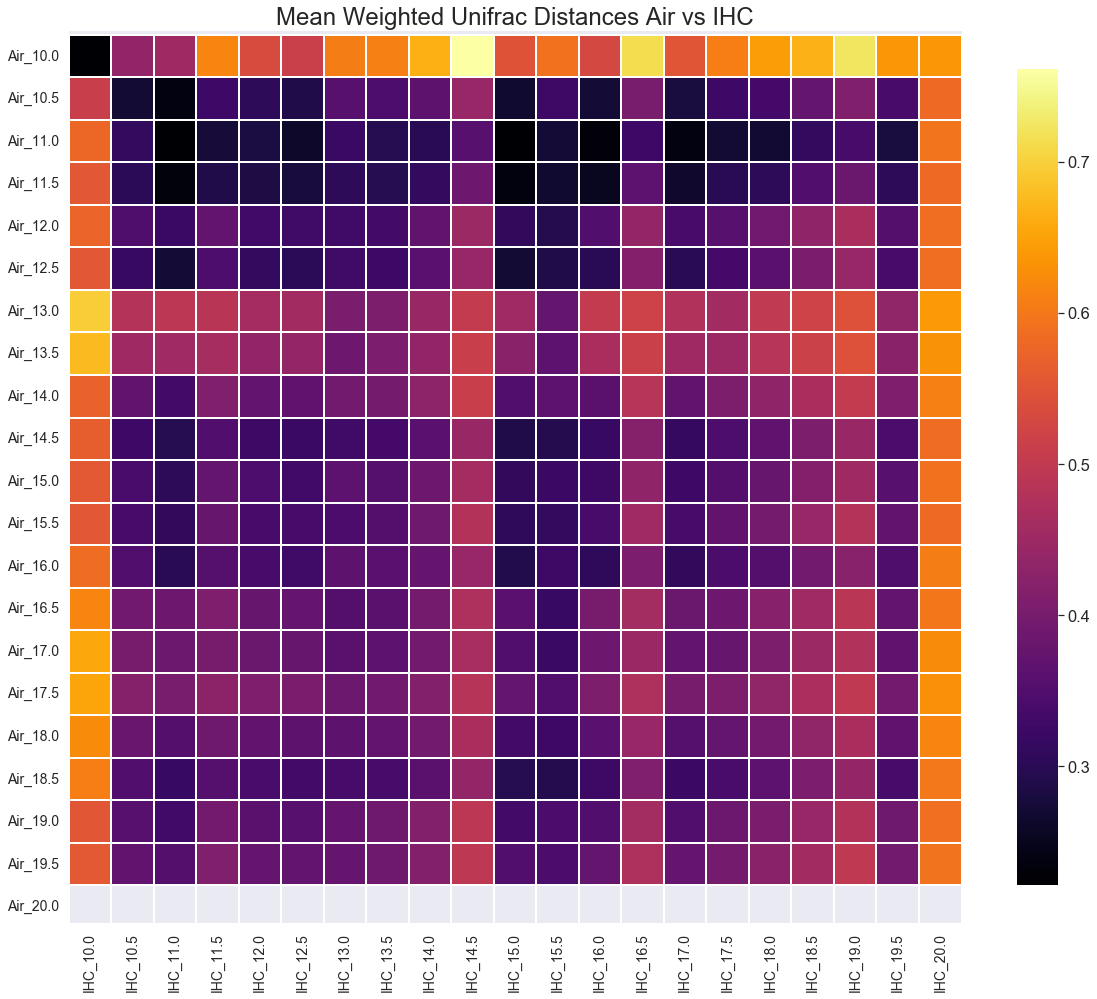

In [64]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mean2_longIHC_wUF_dm, cmap='inferno', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=False, square=True)
sns.set(font_scale=1.5)
#plt.tight_layout()
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center")
ax.set_ylim(len(mean2_longIHC_wUF_dm)-0.1, -0.1) #only until matplotlib 3.1.2 comes out
ax.set_title("Mean Weighted Unifrac Distances Air vs IHC", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIHC_wUF_mean_heatmap.svg', dpi=300, bbox_inches="tight")

In [65]:
mean2_longIHC_wUF_dm_HFDonly = mean2_longIHC_wUF_dm.drop(["IHC_10.0", "IHC_20.0"], axis=1, inplace=True)
mean2_longIHC_wUF_dm_HFDonly = mean2_longIHC_wUF_dm.drop(["Air_10.0", "Air_20.0"], axis=0, inplace=True)

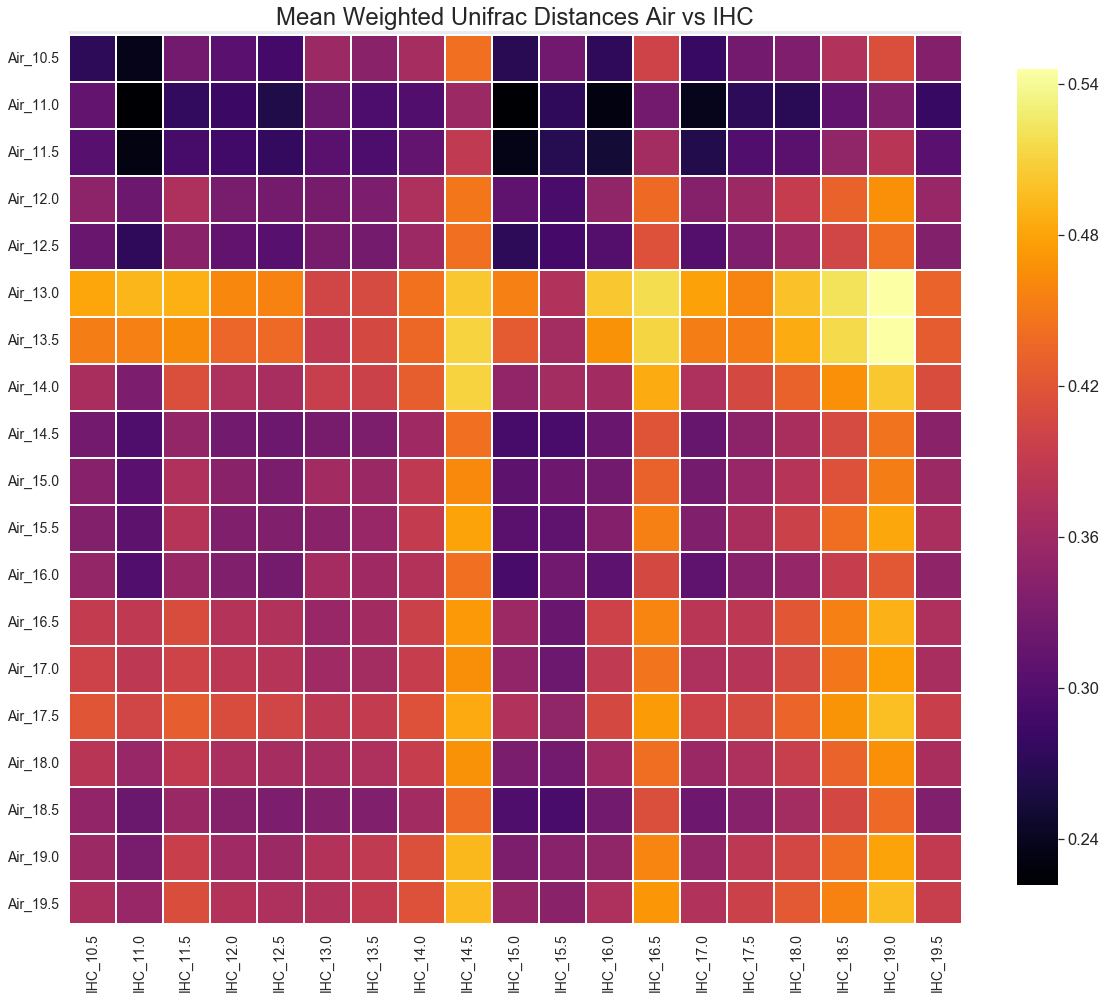

In [66]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mean2_longIHC_wUF_dm, cmap='inferno', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=False, square=True)
sns.set(font_scale=1.5)
#plt.tight_layout()
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center")
ax.set_ylim(len(mean2_longIHC_wUF_dm)-0.1, -0.1) #only until matplotlib 3.1.2 comes out
ax.set_title("Mean Weighted Unifrac Distances Air vs IHC", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIHC_wUF_mean_heatmap_small.svg', dpi=300, bbox_inches="tight")